In [22]:
import pandas as pd
import numpy as np
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn import model_selection
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn import preprocessing

In [23]:
sdf = pd.read_csv('F:/Datasets/AD newDS/ADNI/adni.csv')
sdf.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,5275,135_S_5275,bl,135,ADNI2,ADNI2,27-08-2013,AD,78.0,Female,...,490.4,53.18,1.03993,NaN,1.571460,0,0,0,0,41:10.0
1,5252,009_S_5252,bl,9,ADNI2,ADNI2,14-08-2013,AD,56.5,Male,...,238.0,27.87,1.00227,NaN,1.435610,0,0,0,0,41:10.0
2,5251,016_S_5251,bl,16,ADNI2,ADNI2,08-10-2013,AD,66.1,Female,...,708.0,70.45,1.16539,NaN,1.515710,0,0,0,0,41:10.0
3,5241,023_S_5241,bl,23,ADNI2,ADNI2,25-10-2013,AD,87.8,Male,...,343.7,26.32,1.02216,NaN,0.927626,0,0,0,0,41:10.0
4,5240,018_S_5240,bl,18,ADNI2,ADNI2,26-08-2013,AD,62.7,Female,...,NaN,NaN,1.35676,NaN,1.035730,0,0,0,0,46:25.0


In [24]:
diag = ['AD','CN','EMCI','LMCI']
sdf.groupby('DX_bl').size()

DX_bl
AD      145
CN      136
EMCI    155
LMCI    148
dtype: int64

In [25]:
fdf = sdf[['CDRSB_bl','ADAS11_bl','MMSE_bl','mPACCdigit_bl','Ventricles_bl','Hippocampus_bl','WholeBrain_bl','MOCA_bl','EcogPtTotal_bl','EcogSPTotal_bl','PTAU_bl','AV45_bl','FDG_bl']]
fdf.head()

,CDRSB_bl,ADAS11_bl,MMSE_bl,mPACCdigit_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,MOCA_bl,EcogPtTotal_bl,EcogSPTotal_bl,PTAU_bl,AV45_bl,FDG_bl
0,3.0,16.0,24,-13.9624,71716.0,6843.0,1146280.0,20.0,1.35897,2.83333,53.18,1.571460,1.03993
1,8.0,17.0,25,-11.6207,44247.0,7301.0,1177300.0,19.0,1.66667,3.42857,27.87,1.435610,1.00227
2,2.5,12.0,26,-10.1298,33050.0,5697.0,874118.0,19.0,1.38889,1.48718,70.45,1.515710,1.16539
3,7.0,24.0,22,-19.0467,NaN,2991.0,NaN,14.0,1.40541,3.43590,26.32,0.927626,1.02216
4,2.0,18.0,20,-17.2589,14149.0,7694.0,1012760.0,17.0,3.65789,1.46154,NaN,1.035730,1.35676


In [26]:
tdf = sdf[['DX_bl']]
tdf.head()

,DX_bl
0,AD
1,AD
2,AD
3,AD
4,AD


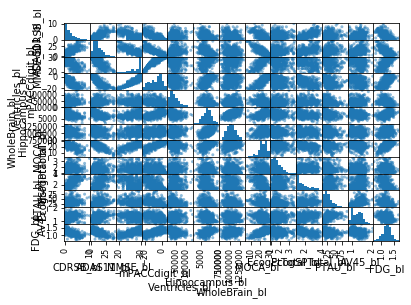

In [27]:
pd.plotting.scatter_matrix(fdf)
plt.show()

In [67]:
def getRocAucScore(Y_validation,prediction,average):
    lb = LabelBinarizer()
    lbdat = lb.fit(tdf['DX_bl'])
    yvalb = lbdat.transform(Y_validation)
    pvalb = lbdat.transform(prediction)
    sc = metrics.roc_auc_score(yvalb, pvalb, average=average)
    return sc

In [29]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(fdf, tdf, test_size=0.2, random_state=0)

In [30]:
X_train = X_train.fillna(X_train.mean())
X_train

,CDRSB_bl,ADAS11_bl,MMSE_bl,mPACCdigit_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,MOCA_bl,EcogPtTotal_bl,EcogSPTotal_bl,PTAU_bl,AV45_bl,FDG_bl
460,2.0,22.0,27,-9.996970,70611.000000,5714.000000,1.148540e+06,24.000000,1.92308,3.15385,36.350000,1.505070,1.109620
422,4.0,23.0,22,-16.289700,84346.000000,4970.000000,1.009240e+06,17.000000,2.15385,3.05128,28.859335,1.373720,0.991308
401,0.5,10.0,29,-4.863600,26381.000000,6806.000000,1.035940e+06,24.000000,1.20513,1.02564,24.860000,1.359710,1.439720
499,0.0,8.0,30,2.443980,40549.705882,6781.496296,1.039922e+06,25.000000,1.41026,1.00000,46.980000,1.220240,1.302500
235,1.0,17.0,30,-7.283220,17906.000000,6781.496296,1.081360e+06,23.000000,1.25641,1.57895,39.170000,1.196840,1.281080
545,0.0,7.0,28,-1.789490,67939.000000,6203.000000,7.811640e+05,24.000000,1.58974,1.02564,8.260000,1.155490,1.391160
78,2.5,8.0,25,-7.808350,51566.000000,6669.000000,1.252400e+06,19.000000,3.46154,1.30769,13.280000,1.338020,1.089720
364,2.5,10.0,28,-10.715000,17130.000000,6788.000000,1.001120e+06,20.000000,2.07692,1.71053,43.220000,1.240570,1.256880
337,1.0,14.0,30,-6.031530,61748.000000,7008.000000,1.138910e+06,22.000000,1.51282,1.44444,21.120000,1.380980,1.109160
96,0.0,3.0,30,3.196630,44026.000000,7475.000000,1.180230e+06,26.000000,1.30769,1.12821,11.770000,1.080230,1.370410


In [31]:
min_max_scaler = preprocessing.MinMaxScaler()
XtrainNm = min_max_scaler.fit_transform(X_train)
X_train = XtrainNm
X_train

array([[ 0.2       ,  0.57894737,  0.72727273, ...,  0.33512288,
         0.55015462,  0.40831127],
       [ 0.4       ,  0.60526316,  0.27272727, ...,  0.2457568 ,
         0.43663238,  0.29115977],
       [ 0.05      ,  0.26315789,  0.90909091, ...,  0.19804343,
         0.42452392,  0.73517337],
       ..., 
       [ 0.05      ,  0.05263158,  0.90909091, ...,  0.26544977,
         0.29926485,  0.74092638],
       [ 0.15      ,  0.15789474,  1.        , ...,  0.00811262,
         0.19089368,  0.43814573],
       [ 0.15      ,  0.39473684,  0.90909091, ...,  0.23586256,
         0.4055272 ,  0.4700893 ]])

In [32]:
X_validation = X_validation.fillna(X_validation.mean())
XValNm = min_max_scaler.fit_transform(X_validation)
X_validation = XValNm
X_validation

array([[ 0.4375    ,  0.43589744,  0.27272727, ...,  0.38690395,
         0.85986436,  0.36823566],
       [ 0.25      ,  0.15384615,  0.90909091, ...,  0.0305665 ,
         0.12396131,  0.74628819],
       [ 0.        ,  0.20512821,  0.90909091, ...,  0.13096047,
         0.60245861,  0.64460178],
       ..., 
       [ 0.75      ,  0.48717949,  0.18181818, ...,  0.38608885,
         0.76295536,  0.22677992],
       [ 0.0625    ,  0.28205128,  0.90909091, ...,  0.14454558,
         0.2020871 ,  0.87251676],
       [ 0.6875    ,  0.46153846,  0.27272727, ...,  0.13911153,
         0.46292206,  0.47538631]])

In [33]:
mnlr = LogisticRegression(solver='sag', max_iter=10000,multi_class='multinomial',C=20)
mnlr

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
mnlr.fit(X_train, Y_train.values.ravel())

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
prediction = mnlr.predict(X_validation)
prediction

array(['AD', 'EMCI', 'CN', 'CN', 'CN', 'AD', 'LMCI', 'AD', 'AD', 'CN',
       'CN', 'CN', 'LMCI', 'LMCI', 'LMCI', 'CN', 'AD', 'LMCI', 'LMCI',
       'LMCI', 'CN', 'EMCI', 'CN', 'CN', 'LMCI', 'CN', 'AD', 'AD', 'LMCI',
       'LMCI', 'AD', 'EMCI', 'EMCI', 'CN', 'CN', 'LMCI', 'AD', 'EMCI',
       'AD', 'AD', 'AD', 'AD', 'LMCI', 'AD', 'LMCI', 'CN', 'LMCI', 'AD',
       'EMCI', 'AD', 'EMCI', 'AD', 'CN', 'EMCI', 'CN', 'EMCI', 'AD', 'AD',
       'AD', 'CN', 'LMCI', 'LMCI', 'AD', 'AD', 'AD', 'AD', 'AD', 'LMCI',
       'EMCI', 'CN', 'CN', 'EMCI', 'EMCI', 'EMCI', 'EMCI', 'EMCI', 'CN',
       'CN', 'CN', 'AD', 'AD', 'CN', 'CN', 'EMCI', 'LMCI', 'CN', 'CN',
       'EMCI', 'CN', 'EMCI', 'CN', 'CN', 'AD', 'LMCI', 'EMCI', 'EMCI',
       'EMCI', 'CN', 'CN', 'CN', 'AD', 'AD', 'EMCI', 'EMCI', 'EMCI',
       'EMCI', 'AD', 'EMCI', 'EMCI', 'AD', 'AD', 'EMCI', 'EMCI', 'EMCI',
       'AD', 'EMCI', 'AD'], dtype=object)

In [36]:
print(metrics.accuracy_score(Y_validation, prediction))

0.837606837607


In [373]:
cv_results = model_selection.cross_val_score(mnlr, X_train, Y_train.values.ravel(), cv=10, scoring='accuracy')

In [360]:
cv_results.mean()

0.76954990445145055

In [37]:
print(metrics.classification_report(Y_validation, prediction))

             precision    recall  f1-score   support

         AD       0.86      0.94      0.90        32
         CN       0.91      0.97      0.94        30
       EMCI       0.77      0.80      0.79        30
       LMCI       0.79      0.60      0.68        25

avg / total       0.83      0.84      0.83       117



In [38]:
cm = metrics.confusion_matrix(Y_validation, prediction)

In [39]:
## Code used from Sklearn tutorial
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[30  0  1  1]
 [ 0 29  1  0]
 [ 0  3 24  3]
 [ 5  0  5 15]]


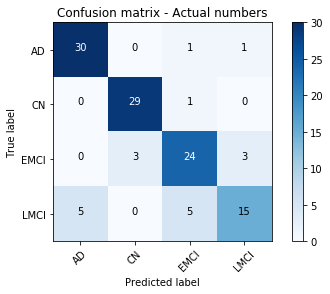

In [40]:
plt.figure()
plot_confusion_matrix(cm, classes=diag,title='Confusion matrix - Actual numbers')

Normalized confusion matrix
[[ 0.9375      0.          0.03125     0.03125   ]
 [ 0.          0.96666667  0.03333333  0.        ]
 [ 0.          0.1         0.8         0.1       ]
 [ 0.2         0.          0.2         0.6       ]]


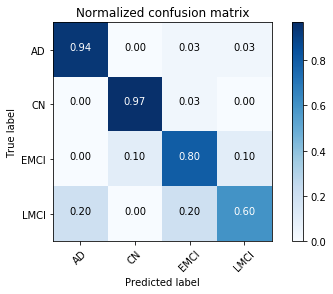

In [41]:
plt.figure()
plot_confusion_matrix(cm, classes=diag, normalize=True,title='Normalized confusion matrix')

In [77]:
print getRocAucScore(Y_validation,prediction,'weighted')

0.891377840492


In [43]:
# SVM - SVC Poly
svcclf = svm.SVC(kernel='poly', C=1, gamma=1)
svcclf

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(fdf, tdf, test_size=0.2, random_state=0)
X_train = X_train.fillna(X_train.mean())
min_max_scaler = preprocessing.MinMaxScaler()
XtrainNm = min_max_scaler.fit_transform(X_train)
X_train = XtrainNm
X_validation = X_validation.fillna(X_validation.mean())
XValNm = min_max_scaler.fit_transform(X_validation)
X_validation = XValNm

In [45]:
#svc_cv = model_selection.cross_val_score(svcclf, cvtrain, cvtarg.values.ravel(), cv=10, scoring='accuracy')
X_train

array([[ 0.2       ,  0.57894737,  0.72727273, ...,  0.33512288,
         0.55015462,  0.40831127],
       [ 0.4       ,  0.60526316,  0.27272727, ...,  0.2457568 ,
         0.43663238,  0.29115977],
       [ 0.05      ,  0.26315789,  0.90909091, ...,  0.19804343,
         0.42452392,  0.73517337],
       ..., 
       [ 0.05      ,  0.05263158,  0.90909091, ...,  0.26544977,
         0.29926485,  0.74092638],
       [ 0.15      ,  0.15789474,  1.        , ...,  0.00811262,
         0.19089368,  0.43814573],
       [ 0.15      ,  0.39473684,  0.90909091, ...,  0.23586256,
         0.4055272 ,  0.4700893 ]])

In [46]:
#svc_cv.mean()
X_validation

array([[ 0.4375    ,  0.43589744,  0.27272727, ...,  0.38690395,
         0.85986436,  0.36823566],
       [ 0.25      ,  0.15384615,  0.90909091, ...,  0.0305665 ,
         0.12396131,  0.74628819],
       [ 0.        ,  0.20512821,  0.90909091, ...,  0.13096047,
         0.60245861,  0.64460178],
       ..., 
       [ 0.75      ,  0.48717949,  0.18181818, ...,  0.38608885,
         0.76295536,  0.22677992],
       [ 0.0625    ,  0.28205128,  0.90909091, ...,  0.14454558,
         0.2020871 ,  0.87251676],
       [ 0.6875    ,  0.46153846,  0.27272727, ...,  0.13911153,
         0.46292206,  0.47538631]])

In [48]:
# SVC poly
svcclf.fit(X_train, Y_train.values.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
svc_pred = svcclf.predict(X_validation)
svc_pred

array(['AD', 'EMCI', 'CN', 'CN', 'CN', 'AD', 'LMCI', 'AD', 'LMCI', 'CN',
       'CN', 'CN', 'LMCI', 'LMCI', 'EMCI', 'CN', 'AD', 'EMCI', 'LMCI',
       'LMCI', 'CN', 'EMCI', 'CN', 'CN', 'LMCI', 'EMCI', 'AD', 'AD',
       'LMCI', 'LMCI', 'AD', 'EMCI', 'EMCI', 'CN', 'CN', 'LMCI', 'AD',
       'EMCI', 'AD', 'AD', 'AD', 'AD', 'LMCI', 'AD', 'LMCI', 'CN', 'AD',
       'AD', 'LMCI', 'AD', 'EMCI', 'AD', 'CN', 'EMCI', 'CN', 'LMCI', 'AD',
       'AD', 'AD', 'CN', 'LMCI', 'EMCI', 'AD', 'AD', 'AD', 'AD', 'AD',
       'LMCI', 'EMCI', 'CN', 'CN', 'EMCI', 'EMCI', 'EMCI', 'CN', 'EMCI',
       'CN', 'CN', 'CN', 'AD', 'AD', 'CN', 'CN', 'EMCI', 'LMCI', 'CN',
       'CN', 'EMCI', 'EMCI', 'EMCI', 'CN', 'CN', 'AD', 'LMCI', 'EMCI',
       'EMCI', 'EMCI', 'CN', 'CN', 'EMCI', 'AD', 'AD', 'EMCI', 'EMCI',
       'EMCI', 'EMCI', 'AD', 'EMCI', 'EMCI', 'AD', 'AD', 'EMCI', 'EMCI',
       'EMCI', 'AD', 'EMCI', 'AD'], dtype=object)

In [50]:
print(metrics.accuracy_score(Y_validation, svc_pred))

0.82905982906


In [51]:
print(metrics.classification_report(Y_validation, svc_pred))

             precision    recall  f1-score   support

         AD       0.83      0.91      0.87        32
         CN       1.00      1.00      1.00        30
       EMCI       0.76      0.87      0.81        30
       LMCI       0.67      0.48      0.56        25

avg / total       0.82      0.83      0.82       117



In [52]:
svccm = metrics.confusion_matrix(Y_validation, svc_pred)

Confusion matrix, without normalization
[[29  0  1  2]
 [ 0 30  0  0]
 [ 0  0 26  4]
 [ 6  0  7 12]]


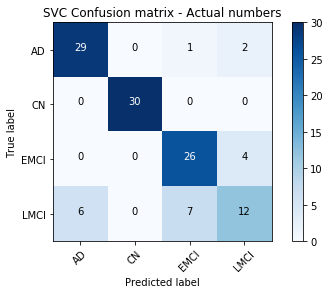

In [53]:
plt.figure()
plot_confusion_matrix(svccm, classes=diag,title='SVC Confusion matrix - Actual numbers')

Normalized confusion matrix
[[ 0.90625     0.          0.03125     0.0625    ]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          0.86666667  0.13333333]
 [ 0.24        0.          0.28        0.48      ]]


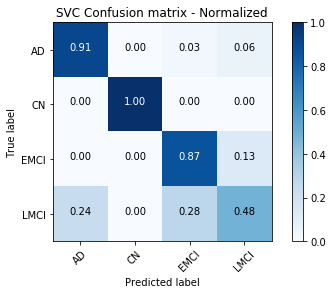

In [54]:
plt.figure()
plot_confusion_matrix(svccm, classes=diag, normalize=True,title='SVC Confusion matrix - Normalized')

In [76]:
print getRocAucScore(Y_validation,svc_pred,'weighted')

0.886120175207


In [56]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(fdf, tdf, test_size=0.2, random_state=0)
X_train = X_train.fillna(X_train.mean())
min_max_scaler = preprocessing.MinMaxScaler()
XtrainNm = min_max_scaler.fit_transform(X_train)
X_train = XtrainNm
X_validation = X_validation.fillna(X_validation.mean())
XValNm = min_max_scaler.fit_transform(X_validation)
X_validation = XValNm

In [57]:
X_train

array([[ 0.2       ,  0.57894737,  0.72727273, ...,  0.33512288,
         0.55015462,  0.40831127],
       [ 0.4       ,  0.60526316,  0.27272727, ...,  0.2457568 ,
         0.43663238,  0.29115977],
       [ 0.05      ,  0.26315789,  0.90909091, ...,  0.19804343,
         0.42452392,  0.73517337],
       ..., 
       [ 0.05      ,  0.05263158,  0.90909091, ...,  0.26544977,
         0.29926485,  0.74092638],
       [ 0.15      ,  0.15789474,  1.        , ...,  0.00811262,
         0.19089368,  0.43814573],
       [ 0.15      ,  0.39473684,  0.90909091, ...,  0.23586256,
         0.4055272 ,  0.4700893 ]])

In [58]:
X_validation

array([[ 0.4375    ,  0.43589744,  0.27272727, ...,  0.38690395,
         0.85986436,  0.36823566],
       [ 0.25      ,  0.15384615,  0.90909091, ...,  0.0305665 ,
         0.12396131,  0.74628819],
       [ 0.        ,  0.20512821,  0.90909091, ...,  0.13096047,
         0.60245861,  0.64460178],
       ..., 
       [ 0.75      ,  0.48717949,  0.18181818, ...,  0.38608885,
         0.76295536,  0.22677992],
       [ 0.0625    ,  0.28205128,  0.90909091, ...,  0.14454558,
         0.2020871 ,  0.87251676],
       [ 0.6875    ,  0.46153846,  0.27272727, ...,  0.13911153,
         0.46292206,  0.47538631]])

In [59]:
# linear SVM
lnsvm = svm.LinearSVC(C=10,multi_class='crammer_singer')
lnsvm

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='crammer_singer', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [60]:
lnsvm.fit(X_train, Y_train.values.ravel())

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='crammer_singer', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [61]:
lnsvm_pred = lnsvm.predict(X_validation)
lnsvm_pred

array(['AD', 'EMCI', 'CN', 'CN', 'CN', 'AD', 'LMCI', 'AD', 'AD', 'CN',
       'CN', 'EMCI', 'LMCI', 'LMCI', 'LMCI', 'CN', 'AD', 'LMCI', 'LMCI',
       'LMCI', 'EMCI', 'EMCI', 'CN', 'CN', 'LMCI', 'EMCI', 'AD', 'AD',
       'AD', 'LMCI', 'AD', 'EMCI', 'EMCI', 'CN', 'CN', 'LMCI', 'AD',
       'EMCI', 'AD', 'AD', 'AD', 'AD', 'EMCI', 'AD', 'EMCI', 'CN', 'LMCI',
       'AD', 'EMCI', 'AD', 'EMCI', 'AD', 'CN', 'EMCI', 'CN', 'EMCI', 'AD',
       'AD', 'AD', 'CN', 'LMCI', 'LMCI', 'AD', 'AD', 'AD', 'AD', 'AD',
       'LMCI', 'EMCI', 'CN', 'CN', 'EMCI', 'EMCI', 'EMCI', 'CN', 'EMCI',
       'CN', 'CN', 'CN', 'AD', 'AD', 'CN', 'CN', 'EMCI', 'LMCI', 'CN',
       'CN', 'EMCI', 'EMCI', 'EMCI', 'CN', 'CN', 'AD', 'LMCI', 'EMCI',
       'EMCI', 'EMCI', 'CN', 'CN', 'EMCI', 'AD', 'AD', 'EMCI', 'EMCI',
       'EMCI', 'EMCI', 'AD', 'EMCI', 'EMCI', 'AD', 'AD', 'EMCI', 'EMCI',
       'EMCI', 'AD', 'EMCI', 'AD'], dtype=object)

In [62]:
print(metrics.accuracy_score(Y_validation, lnsvm_pred))

0.846153846154


In [63]:
print(metrics.classification_report(Y_validation, lnsvm_pred))

             precision    recall  f1-score   support

         AD       0.83      0.94      0.88        32
         CN       1.00      0.93      0.97        30
       EMCI       0.76      0.93      0.84        30
       LMCI       0.81      0.52      0.63        25

avg / total       0.85      0.85      0.84       117



Confusion matrix, without normalization
[[30  0  1  1]
 [ 0 28  2  0]
 [ 0  0 28  2]
 [ 6  0  6 13]]


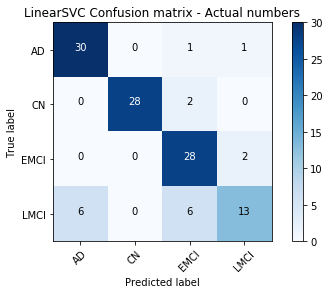

In [64]:
lnsvccm = metrics.confusion_matrix(Y_validation, lnsvm_pred)
plt.figure()
plot_confusion_matrix(lnsvccm, classes=diag,title='LinearSVC Confusion matrix - Actual numbers')

Normalized confusion matrix
[[ 0.9375      0.          0.03125     0.03125   ]
 [ 0.          0.93333333  0.06666667  0.        ]
 [ 0.          0.          0.93333333  0.06666667]
 [ 0.24        0.          0.24        0.52      ]]


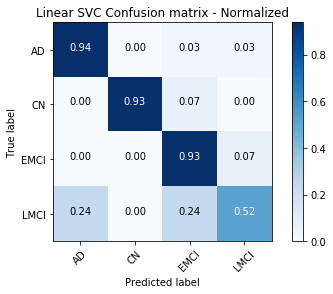

In [65]:
plt.figure()
plot_confusion_matrix(lnsvccm, classes=diag, normalize=True,title='Linear SVC Confusion matrix - Normalized')

In [75]:
print getRocAucScore(Y_validation,lnsvm_pred,'weighted')

0.896677396596
